In [3]:
from ccompletion.tokenizer import PythonTokenizer

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

sns.set(style='darkgrid')
sns.set(font_scale=1.5) # Increase the plot size and font size.
plt.rcParams["figure.figsize"] = (10,5)

tokenizer = PythonTokenizer(vocab_file='models/vocab.bpe')

## Vocabulary Token Lengths

Below is the countplot of the subwords (excluding long tokens since they are rare).

Maximum token length: 519


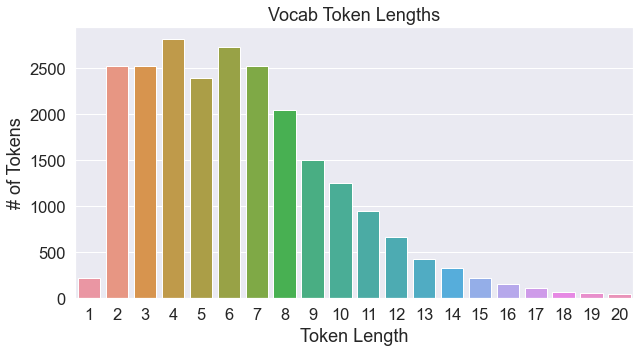

In [4]:
token_lengths = [len(token) for token in tokenizer.bpe.vocab()]
top_token_lengths = sorted(set(token_lengths))[:20]
filtered_token_lengths = [l for l in token_lengths if l in top_token_lengths]

sns.countplot(filtered_token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

## Subword vs initial word comparison

In [5]:
vocab_size = tokenizer.bpe.vocab_size()
initial_words = [token for token in tokenizer.bpe.vocab() if re.match(r'^▁\d+\|\|.+$', token)]
initial_words_count = len(initial_words)
subwords_count = vocab_size - initial_words_count
prcnt = float(subwords_count) / vocab_size

print(f'Number of subwords: {subwords_count} of {vocab_size}')
print(f'Initial words Percentage: {1 - prcnt:.4%}')
print(f'Subwords Percentage: {prcnt:.4%}')

Number of subwords: 17233 of 24000
Initial words Percentage: 28.1958%
Subwords Percentage: 71.8042%


## Tokenizing python source codes

In [32]:
src = 'import tensorflow as tf\nimport numpy as np\n\nclass MigzTokenizer:\n\tpass\n'
tokens = list(tokenizer.split(src))

print(f'Tokens: {tokens}\n')
print(tokenizer.unsplit(tokens))

Tokens: ['62||utf-8', '1||import', '1||tensorflow', '1||as', '1||tf', '4||Ċ', '1||import', '1||numpy', '1||as', '1||np', '4||Ċ', '61||Ċ', '1||class', '1||MigzTokenizer', '11||:', '4||Ċ', '5||ĉ', '1||pass', '4||Ċ', '6||', '0||']

import tensorflow as tf 
import numpy as np 

class MigzTokenizer :
	pass 



In [33]:
# Convert source code into subword tokens
subword_tokens = tokenizer.encode(src)
subword_token_ids = tokenizer.encode(src, return_ids=False)
print(subword_tokens)
print(subword_token_ids)

[975, 412, 6971, 343, 1092, 242, 412, 2341, 343, 629, 242, 250, 628, 672, 493, 73, 15106, 266, 242, 6146, 1295, 242, 288, 971]
['▁62||utf-8', '▁1||import', '▁1||tensorflow', '▁1||as', '▁1||tf', '▁4||Ċ', '▁1||import', '▁1||numpy', '▁1||as', '▁1||np', '▁4||Ċ', '▁61||Ċ', '▁1||class', '▁1||M', 'ig', 'z', 'Tokenizer', '▁11||:', '▁4||Ċ', '▁5||ĉ', '▁1||pass', '▁4||Ċ', '▁6||', '▁0||']


In [34]:
# Show some tokens in the tokenizer
for i in range(50):
    print(tokenizer.bpe.vocab()[i*10:i*10+10])

['<PAD>', '<UNK>', '<BOS>', '<EOS>', '▁', '|', '1', 'Ġ', 'e', '2']
['t', 's', 'a', 'r', 'i', 'o', 'n', 'Ċ', 'l', '3']
['d', '_', '6', 'c', 'p', 'f', 'u', '4', ',', '.']
['m', '7', '8', '(', ')', '0', "'", 'h', 'g', '"']
['=', ':', 'b', 'x', 'y', '5', '9', 'v', '-', 'w']
['k', 'T', '[', ']', 'E', '#', 'S', 'A', '\\', 'N']
['I', 'C', 'R', 'L', 'P', 'D', 'q', 'F', 'O', '*']
['/', 'M', 'j', 'z', 'B', 'U', 'G', '`', '{', '}']
['+', 'H', '>', 'V', 'W', '%', 'K', 'Y', 'X', 'Q']
['@', '<', 'J', 'Z', 'ĉ', ';', 'č', '!', 'Ã', 'å']
['?', 'æ', '&', 'â', '$', 'Ģ', 'Ķ', '~', 'ç', '^']
['è', 'ä', 'ģ', 'é', '¸', 'Ä', 'º', '¡', 'ł', '¼']
['į', 'İ', 'Ð', 'Ĳ', '¨', '¹', 'Ī', '»', '°', 'Ç']
['Ĥ', 'Ń', 'ľ', '¬', '¯', 'Į', 'ķ', '½', '©', 'ĩ']
['ı', '¤', '®', '«', 'Ħ', 'ļ', 'ĸ', 'ã', 'ī', '¿']
['ĵ', 'Ľ', '¥', 'à', 'Ĺ', '³', 'Ĩ', '¾', 'ħ', '²']
['ĥ', '§', 'Ł', 'ĭ', 'Ŀ', '´', '¦', '·', 'ĺ', '¶']
['±', 'Ĭ', 'ï', 'ĳ', 'Ļ', 'Ñ', 'µ', 'Å', 'Ø', 'ŀ']
['ª', 'Ĵ', '£', '¢', 'Ù', 'á', 'ð', 'Â', 'Î', 'ě']
['Ï', '×', 'ì'